In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py

from PIL import Image

In [25]:
datasets_path = 'C://Users//User//Downloads//Pattern Recognition Project//dataset' 
h5_path = 'C://Users/User//Downloads//Pattern Recognition Project//HDF5//image_data.h5'
TARGET_SIZE = (50,50)

In [26]:
def load_image(image_path):
    """Load an image from the specified path and convert it to a NumPy array."""
    with Image.open(image_path) as img:
        img = img.resize(TARGET_SIZE)
        img_data = np.array(img)
    return img_data

def save_images_to_h5(datasets_path, h5_path):
    """
    Save images with hierarchical structure to an HDF5 file.

    Parameters:
    datasets_path (str): The root directory containing 'train' and 'test' subdirectories.
    h5_path (str): The path where the HDF5 file will be saved.
    """
    with h5py.File(h5_path, 'w') as h5_file:
        for split in ['train', 'test' , 'valid']:
            split_path = os.path.join(datasets_path, split)
            if os.path.isdir(split_path):
                split_group = h5_file.create_group(split)
                for category in os.listdir(split_path):
                    category_path = os.path.join(split_path, category)
                    if os.path.isdir(category_path):
                        category_group = split_group.create_group(category)
                        for image_name in os.listdir(category_path):
                            print(category_group)
                            image_path = os.path.join(category_path, image_name)
                            if os.path.isfile(image_path):
                                img_data = load_image(image_path)
                                category_group.create_dataset(image_name, data=img_data, compression="gzip", compression_opts=9)

# Example usage:
save_images_to_h5(datasets_path, h5_path)

print(f"Image data with hierarchical structure has been saved to {h5_path}")

<HDF5 group "/train/0" (0 members)>
<HDF5 group "/train/0" (1 members)>
<HDF5 group "/train/0" (2 members)>
<HDF5 group "/train/0" (3 members)>
<HDF5 group "/train/0" (4 members)>
<HDF5 group "/train/0" (5 members)>
<HDF5 group "/train/0" (6 members)>
<HDF5 group "/train/0" (7 members)>
<HDF5 group "/train/0" (8 members)>
<HDF5 group "/train/0" (9 members)>
<HDF5 group "/train/0" (10 members)>
<HDF5 group "/train/0" (11 members)>
<HDF5 group "/train/0" (12 members)>
<HDF5 group "/train/0" (13 members)>
<HDF5 group "/train/0" (14 members)>
<HDF5 group "/train/0" (15 members)>
<HDF5 group "/train/0" (16 members)>
<HDF5 group "/train/0" (17 members)>
<HDF5 group "/train/0" (18 members)>
<HDF5 group "/train/0" (19 members)>
<HDF5 group "/train/0" (20 members)>
<HDF5 group "/train/0" (21 members)>
<HDF5 group "/train/0" (22 members)>
<HDF5 group "/train/0" (23 members)>
<HDF5 group "/train/0" (24 members)>
<HDF5 group "/train/0" (25 members)>
<HDF5 group "/train/0" (26 members)>
<HDF5 group

In [27]:
import numpy as np
import h5py

X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

with h5py.File(h5_path, 'r') as h5_file:
    for split in ['train', 'test', 'valid']:
        if split in h5_file:
            split_group = h5_file[split]
            for category in split_group.keys():
                category_group = split_group[category]
                print(f"Processing category '{category}' in split '{split}'")
                if category != ".ipynb_checkpoints":
                    label = int(category)
                for image_name in category_group.keys():
                    image_data = category_group[image_name][()]
                    if split == 'train':
                        X_train.append(image_data)
                        y_train.append(label)
                    elif split == 'test':
                        X_test.append(image_data)
                        y_test.append(label)
                    elif split == 'valid':
                        X_valid.append(image_data)
                        y_valid.append(label)
        else:
            print(f"Split '{split}' not found in HDF5 file.")

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)  # Corrected lines

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")


Processing category '0' in split 'train'
Processing category '1' in split 'train'
Processing category '2' in split 'train'
Processing category '3' in split 'train'
Processing category '0' in split 'test'
Processing category '1' in split 'test'
Processing category '2' in split 'test'
Processing category '3' in split 'test'
Processing category '0' in split 'valid'
Processing category '1' in split 'valid'
Processing category '2' in split 'valid'
Processing category '3' in split 'valid'
X_train shape: (744, 50, 50, 3)
y_train shape: (744,)
X_test shape: (248, 50, 50, 3)
y_test shape: (248,)
X_valid shape: (248, 50, 50, 3)
y_valid shape: (248,)


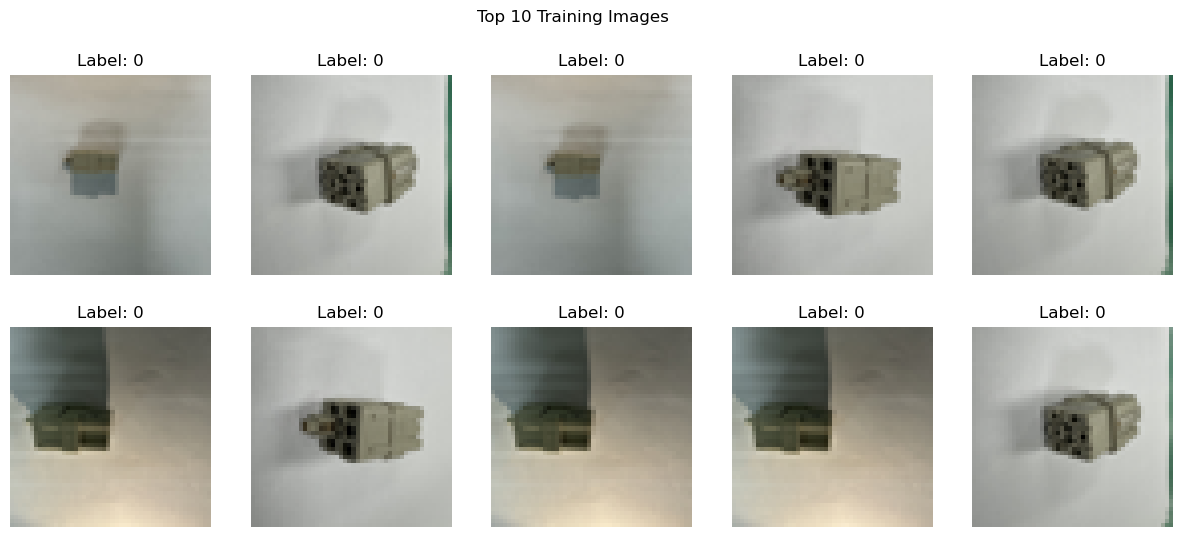

In [28]:
def plot_images(images, labels, num_images=10, title='Top 10 Images'):
    """
    Plot the top `num_images` images with their labels.

    Parameters:
    images (np.ndarray): Array of image data.
    labels (np.ndarray): Array of labels corresponding to the images.
    num_images (int): Number of images to plot.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        ax = plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i].astype('uint8'))
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Example usage:
num_images_to_plot = 10
plot_images(X_train, y_train, num_images=num_images_to_plot, title='Top 10 Training Images')
